In [1]:
import yfinance as yf
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.collections
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
import time
%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display
import matplotlib.collections
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 
%matplotlib notebook

In [2]:

# Define a list of ticker symbols for the currency pairs
ticker_symbols = ['CADUSD=X', 'CADEUR=X', 'CADGBP=X','CADAUD=X','CADNZD=X','CADCHF=X','CADHKD=X','CADCNY=X','CADSAR=X']

# Create an empty list to store DataFrames
dfs = []

# Loop through each ticker symbol
for symbol in ticker_symbols:
    # Create a Ticker object for the currency pair
    ticker = yf.Ticker(symbol)
    
    # Fetch real-time data for the currency pair
    data = ticker.history(period='1d')
    
    # Create a DataFrame for the real-time data
    df = pd.DataFrame(data)
    
    # Add a column for the currency pair
    df['Currency Pair'] = symbol
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
result_df = pd.concat(dfs)

# Display the result DataFrame
print(result_df)

                Open      High       Low     Close  Volume  Dividends  \
Date                                                                    
2024-04-26  0.732172  0.733321  0.730241  0.732172       0          0   
2024-04-26  0.682473  0.684380  0.681800  0.682420       0          0   
2024-04-26  0.585270  0.586620  0.584560  0.585260       0          0   
2024-04-26  1.122420  1.122960  1.117600  1.122300       0          0   
2024-04-26  1.228780  1.231560  1.227050  1.228700       0          0   
2024-04-26  0.668060  0.669160  0.666700  0.668060       0          0   
2024-04-26  5.730110  5.740450  5.715234  5.730689       0          0   
2024-04-26  5.184803  5.191264  5.155490  5.184515       0          0   
2024-04-26  2.742457  2.746507  2.735640  2.742989       0          0   

            Stock Splits Currency Pair  
Date                                    
2024-04-26             0      CADUSD=X  
2024-04-26             0      CADEUR=X  
2024-04-26             0      CA

In [3]:
# Example exchange rate data (replace this with your actual data)
exchange_rates = {
    'CAD to USD': 0.732998,
    'CAD to EUR': 0.683000,
    'CAD to GBP': 0.585500,
    'CAD to AUD': 1.119900,
    'CAD to NZD': 1.227400,
    'CAD to CHF': 0.668830,
    'CAD to HKD': 5.738420,
    'CAD to CNY': 5.310600,
    'CAD to SAR': 2.742600
    
}

# Create a DataFrame from the exchange rate data
df = pd.DataFrame(list(exchange_rates.items()), columns=['Currency Pair', 'Exchange Rate'])

# Display the DataFrame
print(df)

  Currency Pair  Exchange Rate
0    CAD to USD       0.732998
1    CAD to EUR       0.683000
2    CAD to GBP       0.585500
3    CAD to AUD       1.119900
4    CAD to NZD       1.227400
5    CAD to CHF       0.668830
6    CAD to HKD       5.738420
7    CAD to CNY       5.310600
8    CAD to SAR       2.742600


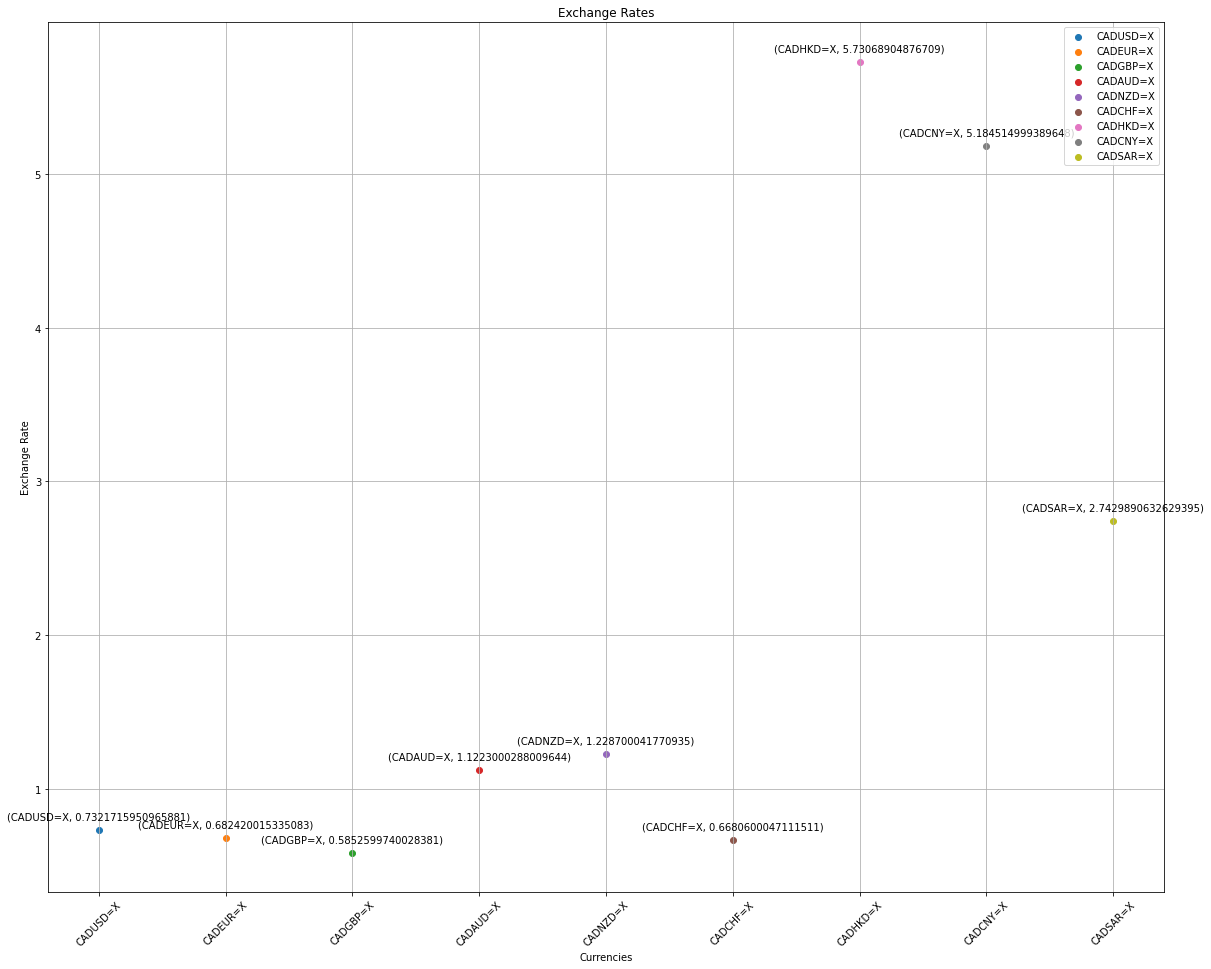

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 16))
# Assuming result_df is your DataFrame containing exchange rate data
for symbol in ticker_symbols:
    # Filter data for the current currency pair
    df_pair = result_df[result_df['Currency Pair'] == symbol]
    plt.scatter([symbol]*len(df_pair), df_pair['Close'], label=symbol)  # Use ticker symbol as x-axis label

    # Annotate each point with its coordinates
    for i, (x, y) in enumerate(zip([symbol]*len(df_pair), df_pair['Close'])):
        plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Customize the plot
plt.xlabel('Currencies')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Enable gridlines
plt.grid(True)

# Show the initial plot
plt.show()

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
from ipywidgets import interact, widgets
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
from IPython.display import display
import matplotlib.collections
import numpy as np
import matplotlib.ticker as ticker 
%matplotlib notebook
from matplotlib.animation import FuncAnimation


def plot_exchange_rates(currency, time_period):
    # Define start and end dates based on the selected time period
    if time_period == '5 Years':
        start_date = pd.Timestamp.now() - pd.DateOffset(years=5)
    elif time_period == '1 Year':
        start_date = pd.Timestamp.now() - pd.DateOffset(years=1)
    elif time_period == '6 Months':
        start_date = pd.Timestamp.now() - pd.DateOffset(months=6)
    elif time_period == '1 Month':
        start_date = pd.Timestamp.now() - pd.DateOffset(months=1)
    elif time_period == '5 Days':
        start_date = pd.Timestamp.now() - pd.DateOffset(days=5)
    else:
        start_date = pd.Timestamp.now() - pd.DateOffset(years=5)  # Default to 5 years
    
    # Fetch historical data for the selected currency pair from Yahoo Finance
    data = yf.download(currency, start=start_date, end=pd.Timestamp.now())
    
    def plot_exchange_rates(currency, time_period):
    # Fetch historical data for the selected currency pair from Yahoo Finance
        data = yf.download(currency, start=start_date, end=pd.Timestamp.now())
    
    # Plot exchange rates
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data.index, data['Close'])  # Use data.index for dates and data['Close'] for exchange rates
    ax.set_title(f'Exchange Rates for {currency} ({time_period})')
    ax.set_xlabel('Date')
    ax.set_ylabel('Exchange Rate')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Enable scroll zooming
    mplcursors.cursor(hover=True)
    mplcursors.cursor().connect("add", lambda sel: sel.annotation.set_visible(False))
    
    def on_scroll(event):
        axtemp = event.inaxes
        xlim = axtemp.get_xlim()
        ylim = axtemp.get_ylim()
        x_center = np.mean(xlim)
        y_center = np.mean(ylim)
        if event.button == 'up':
            # deal with zoom in
            scale_factor = 0.9
        elif event.button == 'down':
            # deal with zoom out
            scale_factor = 1.1
        else:
            # deal with something that should never happen
            scale_factor = 1
        axtemp.set_xlim([x_center - (x_center - xlim[0]) * scale_factor,
                         x_center + (xlim[1] - x_center) * scale_factor])
        axtemp.set_ylim([y_center - (y_center - ylim[0]) * scale_factor,
                         y_center + (ylim[1] - y_center) * scale_factor])
        plt.draw()  # force re-draw
    
    fig.canvas.mpl_connect('scroll_event', on_scroll)
    
    def on_click(event):
        if event.button == 1:  # Check if left mouse button is clicked
            ax._initial_xlim = ax.get_xlim()
            ax._initial_ylim = ax.get_ylim()
            ax._startx = event.xdata
            ax._starty = event.ydata
    
    def on_release(event):
        ax._startx = None
        ax._starty = None
    
def on_motion(event):
    if ax._startx is not None and ax._starty is not None:
        xlim = ax._initial_xlim - (event.xdata - ax._startx)
        ylim = ax._initial_ylim - (event.ydata - ax._starty)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.figure.canvas.draw_idle()  # Update the plot only after the mouse is released
    
    fig.canvas.mpl_connect('button_press_event', on_click)
    fig.canvas.mpl_connect('button_release_event', on_release)
    fig.canvas.mpl_connect('motion_notify_event', on_motion)
    
    plt.show()
    
    def update(frame, data):
        data = yf.download(currency, start=start_date, end=pd.Timestamp.now())
    line.set_data(data.index, data['Close'])
    ax.relim()
    ax.autoscale_view()
    return line,
    
    # Animate the plot with data updates every 60 seconds
    
    anim = FuncAnimation(fig, update, interval=60000)
    
    plt.show()
    return anim
# Create interactive widgets for currency and time period selection
currency_dropdown = widgets.Dropdown(options=['CADUSD=X', 'CADEUR=X', 'CADGBP=X', 'CADAUD=X', 'CADNZD=X','CADCHF=X','CADHKD=X','CADCNY=X','CADSAR=X'],
                                     description='Currency:')
time_period_dropdown = widgets.Dropdown(options=['5 Years', '1 Year', '6 Months', '1 Month', '5 Days'],
                                        description='Time Period:')

# Combine widgets and the plot function using interact
interact(plot_exchange_rates, currency=currency_dropdown, time_period=time_period_dropdown)

interactive(children=(Dropdown(description='Currency:', options=('CADUSD=X', 'CADEUR=X', 'CADGBP=X', 'CADAUD=X…

<function __main__.plot_exchange_rates(currency, time_period)>